## Import Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
os.chdir("D:/")

## Data Collection and Data Analysis

In [4]:
df=pd.read_csv("car data.csv")

In [5]:
# print top 5 row of dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
# show informaton of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# statistical measure of dataset
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [16]:
# check null value of dataset
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# print number of row and column
df.shape

(301, 9)

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


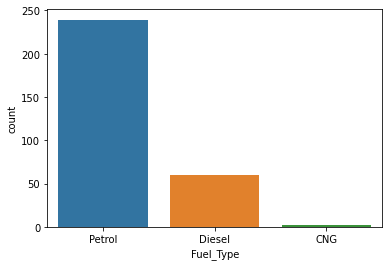

In [11]:
# countplot of Fuel Type
sns.countplot("Fuel_Type",data=df)
print(df["Fuel_Type"].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


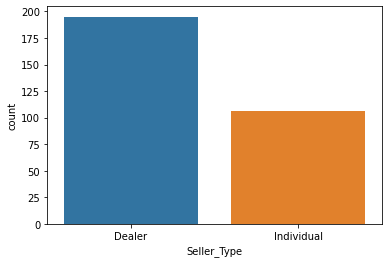

In [14]:
# countplot of Seller_Type
sns.countplot("Seller_Type",data=df)
print(df["Seller_Type"].value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


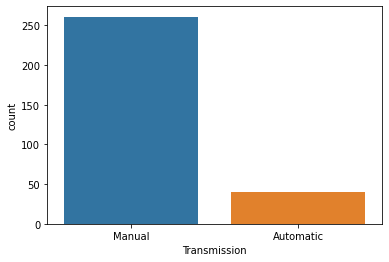

In [15]:
# countplot of Transmission
sns.countplot("Transmission",data=df)
print(df["Transmission"].value_counts())

## Label Encoding

In [17]:
# convert object data to numerical data
df.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2},"Seller_Type":{"Dealer":0,"Individual":1},
           "Transmission":{"Manual":0,"Automatic":1}},inplace=True)

In [18]:
# print top 5 of dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Data Pre-processing

In [19]:
# separate the data and label
x=df.drop(["Car_Name","Selling_Price"],axis=1)
y=df.Selling_Price

In [20]:
print(x)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

## Train Test Split

In [21]:
# load train test split library
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [22]:
print(x.shape,x_train.shape,x_test.shape)

(301, 7) (240, 7) (61, 7)


## Model Training
## Linear Regression

In [23]:
# load linear regression library
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [25]:
# model train on training data
model.fit(x_train,y_train)

LinearRegression()

In [34]:
from sklearn.metrics import r2_score

In [35]:
# show R2 Score on training data
y_train_pred=model.predict(x_train)
y_train_r2_score=r2_score(y_train,y_train_pred)

In [36]:
print("R2 Score on Training data:",y_train_r2_score)

R2 Score on Training data: 0.8843647367786586


In [37]:
# show R2 Score on test data
y_test_pred=model.predict(x_test)
y_test_r2_score=r2_score(y_test,y_test_pred)

In [38]:
print("R2 Score on Test data:",y_test_r2_score)

R2 Score on Test data: 0.8434932173885448


## Making a Predictive System

In [39]:
input_data=(2013,9.54,43000,1,0,0,0)

# convert input data to a numpy array
input_data_numpy_array=np.asarray(input_data)

# reshape the numpy array
reshape_numpy_array=input_data_numpy_array.reshape(1,-1)

# prediction
prediction=model.predict(reshape_numpy_array)
print(prediction)

[6.45101785]
